In [42]:
# Importing libraries
import pandas as pd
import numpy as np
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import time
from matplotlib import pyplot

In [62]:
#loading iris data obtained from http://archive.ics.uci.edu/ml/machine-learning-databases/iris/
#change three classes into 
data=read_csv('iris.data.csv', names=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class_name'])
data=data.sample(frac=1)
dataset= data.values


In [66]:
X=dataset[:, 0:4]
y=dataset[:,-1]
#Encode string class as integers
label_encoded_y=LabelEncoder().fit_transform(y)

1 0.03739190101623535
2 0.021898984909057617
3 0.024487018585205078
4 0.02412581443786621


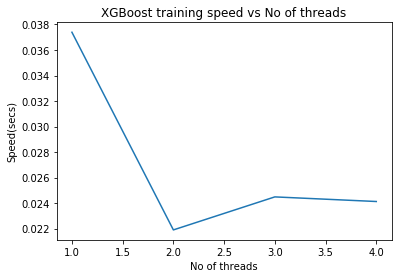

In [77]:
result=[]
num_threads=[1,2,3,4]
for n in num_threads:
    start=time.time()
    model=XGBClassifier(nthread=n)
    model.fit(X,label_encoded_y)
    elapsed=time.time()-start
    print(n,elapsed)
    result.append(elapsed)
pyplot.plot(num_threads,result)
pyplot.ylabel('Speed(secs)')
pyplot.xlabel('No of threads')
pyplot.title("XGBoost training speed vs No of threads")
pyplot.show()

In [78]:
from sklearn.model_selection import train_test_split
seed=7
test_size=0.33
X_train, X_test, y_train, y_test=train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)

In [79]:
model=XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [85]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
predictions=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,predictions)
print("Accuracy: %.2f%%" % (accuracy *100))

Accuracy: 94.00%


In [88]:
#K-Fold validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
kfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

In [102]:
#Single thread XGBoost, Parallel Thread cross validation
start=time.time()
model=XGBClassifier(nthreads=1)
results=cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss', n_jobs=-1)
elapsed=time.time() -start
print("Single thread XGBoost, parallel thread CV :%f sec" %(elapsed))


Single thread XGBoost, parallel thread CV :0.309305 sec


In [103]:
#Parallel thread XGBoost, Single thread CV
start=time.time()
model=XGBClassifier(nthreads=1)
results= cross_val_score(model, X, label_encoded_y,cv=kfold, scoring='neg_log_loss', n_jobs=1)
elapsed=time.time()-start
print("Parallel thread XGBoost, Single thread CV: %f sec" % (elapsed))

Parallel thread XGBoost, Single thread CV: 0.281808 sec


In [104]:
#Parallel thread XGBoost and CV
start=time.time()
model=XGBClassifier(nthread=-1)
results=cross_val_score(model, X, label_encoded_y,cv=kfold, scoring='neg_log_loss', n_jobs=-1)
elapsed=time.time()-start
print("Parallel thread XGBoost and CV: %f sec" % (elapsed))

Parallel thread XGBoost and CV: 1.343938 sec
